# Final Python Assignment

Use the following table to provide us with

|name | student number|
|----|----|
|Kevin van Eijden| 2000214|
|other group member's name| student number|

# Read this carefully

This is the final assignment for python. You also need to make the R part of this final assignment. 

With this python part of the final assignment, you can earn 4 points.

This assignment needs to be uploaded June 13 (23:59 at the latest). You cannot use this assignment for the resit!

After you have finished this exam, do the following:

* upload your python and R files to github
* create two links in your README file:

    * one link to "final python assignment"
    * one link to "final R assignment"

* fill in the google form (see link on Blackboard) that you have uploaded your files
* use the same student number you gave us before, otherwise we cannot retrieve your pass/fail grades


# Bargaining model

In the python lectures we considered a two period bargaining model. In the assignment of week 5, we extended this to a three period model.

In this final assignment we are going to extend the model to $n$ periods, where $n$ is a variable.

Although in the lectures and assignments we worked with plotly to make graphs, here we will use [matplotlib](https://matplotlib.org/). Hence, you need to google to see how plots are made using this library. An important aspect of using open source software is that you can figure out yourself how to use (new) things.


# Import libraries

First, we need to import some libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


**1)** [0.5 point] Use `np.arrange` to create a list of offers between 0.0 and 10.0 (including 10.0) with step 0.1:

In [3]:
min_offer = 0.0
max_offer = 10.0
step = 0.1
offers = np.arange(min_offer, max_offer +0.1, step)
print(offers)

[  0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.1
   1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9   2.    2.1   2.2   2.3
   2.4   2.5   2.6   2.7   2.8   2.9   3.    3.1   3.2   3.3   3.4   3.5
   3.6   3.7   3.8   3.9   4.    4.1   4.2   4.3   4.4   4.5   4.6   4.7
   4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5   5.6   5.7   5.8   5.9
   6.    6.1   6.2   6.3   6.4   6.5   6.6   6.7   6.8   6.9   7.    7.1
   7.2   7.3   7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2   8.3
   8.4   8.5   8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4   9.5
   9.6   9.7   9.8   9.9  10. ]


**Explanation:** <br>
First I defined all variables. So min_offer, max_offer and step. Then I created a list, offers, with the np.arange function. This function first needs the lowest value of the list, which is min_offer, then it needs the highest value of the list, which is 10.0 but this function excludes the last value so we add + 0.1 so it does include 10.0. The last thing we need to tell the function is the step between the values of the function, which in this case is 0.1. 

**2)** [0.5 point] Introduce the functions `accept_offer` and `make_offer` as in the lecture:

In [4]:
def accept_offer(offer,your_outside_option):
    accept = (offer >= your_outside_option)
    return accept

def make_offer(your_outside_option,other_outside_option):
    profits = [(max_offer-offer)*accept_offer(offer,other_outside_option) for offer in offers]
    max_profit = max(profits)
    max_index = profits.index(max_profit)
    if max_profit >= your_outside_option:
        your_offer = offers[max_index]
        your_profit = max_offer-offers[max_index]
        other_profit = offers[max_index]
    else:
        your_offer = -1 # no offer is made
        your_profit = your_outside_option
        other_profit = other_outside_option
    return your_offer, your_profit, other_profit

**Explanation:** <br> I first define the accept_offer function. This function checks if the offer you get is equal or greater than your outside option. It return true if the offer you get is greater or equal to your outside option and it returns false if it isn't. <br><br> Secondly I defined the make_offer function. This function first checks if your_outside_option and other_outside option together is 10 or smaller, because it can't be greater than 10, because you only have 10 to devide. So it returns -1 to your_offer if it is actually greater than 10 which means no offer is made. If an actual offer is made this function defines if it is greater than the outside offer of the other person, and finally gives the return of the offer you made, your profit and the other persons profit.

**3)** [0.5 point] Initialize a dictionary `offer` as in the assignment of week 5:

In [7]:
offer = {}

**Explanation:** <br> The curly brackets mean that the dictionary of offer is empty. This is beacause we have a bargaining model with ***n*** periods.

**4)** [0.5 point] Complete the following function such that it returns the payoffs to players 1 and 2 for a game of length $n$ periods when the discount factor is given by $\delta$:

In [15]:
def outcome(n,delta):
    offer[n+1]=[0,0,0]
    for i in range(n):
        offer[n-i]= make_offer(delta*offer[(n-i)+1][2], delta*offer[(n-i)+1][1])
    return offer

**Explanation:** <br>
For the offer in period n-i, I used the make_offer function. With delta multiplied with offer[(n-i)+1][] I calculated your_outside_option and other_outside_option. Delta is ofcourse the discount factor and the value of the profit in the next round is (n-i)+1. The +1 is because it is about the next round. In the last brackets there is a 1 or 2. These numbers refer to the index numbers of the outcome of offer[(n-i)+1]. <br><br> The return in this case is ofcourse offer. Which gives us, your_offer, your_profit, other_profit.

**5)** [0.5 point] Check the outcomes for the case where $\delta = 0.9$, $n=1, 2$ and $n=3$ (these are outcomes that you have seen before).

In [19]:
delta = 0.9
n = 1
outcome(n,delta)

{1: (0.0, 10.0, 0.0), 2: [0, 0, 0], 3: [0, 0, 0]}

**Explanation:** Because there is only 1 round, your offer is 0 and the other person accepts this because he really has no better option. This makes your profit 10 and the other persons profit 0. Ofcourse there is no 2 and 3 round, so all those numbers are 0.

In [20]:
delta = 0.9
n = 2
outcome(n,delta)

{1: (9.0, 1.0, 9.0), 2: (0.0, 10.0, 0.0), 3: [0, 0, 0]}

**Explanation:** There are only 2 rounds and because player 2 gets offered only 9 in the first round, he doesn't accepts this because in the second round he offers 0 to player 1 and player 2 gets 10, which is more than 9. There is no third round so those numbers are 0.

In [21]:
delta = 0.9
n = 3
outcome(n,delta)

{1: (0.90000000000000002, 9.0999999999999996, 0.90000000000000002),
 2: (9.0, 1.0, 9.0),
 3: (0.0, 10.0, 0.0),
 4: [0, 0, 0]}

**Explanation:** I used backward induction to solve this problem and you can see that it ends in round 1. First we look at round 3: Player 1 gets 10 and player 2 gets 0. In round 2: Player 2 gets 1 and player 1 gets 9, but player 1 won't accept that because he could get 10 in round 3. In round 1: Player 1 gets 9.1 and player 2 gets 0.9 so it is best for player 2 to accept this offer. There is no round 4 so those numbers are 0.

**6)** [1 point] *Using matplotlib* plot for the case with $\delta =0.9$, the payoff for player 1 of a game that lasts for 1 round, a game that lasts for 2 rounds, up till a game that lasts 30 rounds. On the horizontal axis, we have the length of the game $n$; on the vertical axis the payoff to player 1.

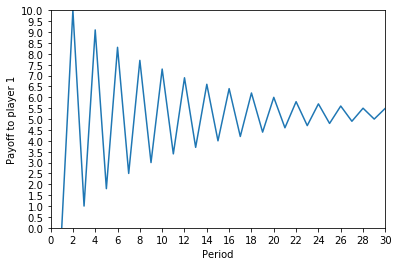

In [29]:
n=30
delta = 0.9
range_n = np.arange(1,n+1,1)
payoff1 = [outcome(n,delta)[1][1] for n in range(30)]
plt.xlim(0,30)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30])
plt.xlabel("Period")
plt.ylim(0,10)
plt.yticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10])
plt.ylabel("Payoff to player 1")
plt.plot(range_n, payoff1)

**Explanation:** <br>
The payoff1 is the payoff to player 1, this is given on the y-axis. On the x-axis I have the Period, which is given by range_n. Lines 5, 6 and 7 give respectively the range, the ticks and the label of the x-axis. Lines 8, 9 and 10 give respectively the range, the ticks and the label of the y-axis.The last line of the code plots the graph.


**7)** [0.5 point] What pattern do you see in the graph? What is the intuition/explanation for this? [hint: if you cannot plot the outcome with matplotlib, you can still answer this question; e.g. simply by looking at the outcomes for different values of $n$]

**Explanation:** <br>
We can see that with a higher period the line gets smaller to the middle of 5. This makes sense because both player try to make as much profit as possible so they both start with a low offer and when they notice the other player won't accept this, their offer in the next round is higher than the previous one. 